<a href="https://colab.research.google.com/github/gustavoramos82/workshop-dados-abertos/blob/main/Workshop_analise_de_dados_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop de análise de dados com python

Esse notebook foi pra mostrar um pouco do uso de Pytho para fazer análise de dados aqui foi utilizado dados de revenda de combustiveis da anp do primeiro semestre de 2023 (que pode ser encontrado [aqui](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis)) o intuio é compara os preços de revenda do combustivel e fazer comparações.

In [ ]:
# Importando as blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
preco_semestre = pd.read_csv('Preços semestrais - AUTOMOTIVOS_2023.01.csv',sep=';') #Importando o arquivo csv
preco_semestre.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/01/2023,"3,39",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,DIESEL S10,03/01/2023,"6,21",NaN,R$ / litro,BRANCA
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,03/01/2023,"4,39",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,02/01/2023,"3,89",NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,DIESEL,02/01/2023,"6,49",NaN,R$ / litro,VIBRA ENERGIA


### Dicionário dos dados

- **Regiao - Sigla**: Sigla da Região da
revenda pesquisada
- **Estado - Sigla**: Sigla da Unidade Federativa (UF) da revenda pesquisada
- **Municipio**: Nome do município da revenda pesquisada
- **Produto**: Nome do combustível pesquisado
- **Data da Coleta**: Data da coleta do(s) preço(s)
- **Valor de venda**: Preço de venda ao consumidor final praticado pelo
revendedor, na data da coleta
- **Unidade de Medida**
- **Bandeira**: Noma da Bandeira da revenda.
O Posto bandeirado é aquele que opta por exibir a marca comercial de um
distribuidor, o posto deverá vender somente combustíveis fornecidos pelo
distribuidor detentor da marca comercial exibida aos consumidores. Já o
Posto bandeira branca é o que opta por não exibir marca comercial de
nenhuma distribuidora.

In [ ]:
preco_semestre = preco_semestre[['Regiao - Sigla','Estado - Sigla','Municipio','Produto',
                                 'Valor de Venda','Unidade de Medida','Bandeira']] #Selecionando as colunas que vão ser utilizadas para a análise
preco_semestre.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,ETANOL,"3,39",R$ / litro,BRANCA
1,SE,SP,SOROCABA,DIESEL S10,"6,21",R$ / litro,BRANCA
2,SE,SP,SOROCABA,GASOLINA,"4,39",R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,ETANOL,"3,89",R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,DIESEL,"6,49",R$ / litro,VIBRA ENERGIA


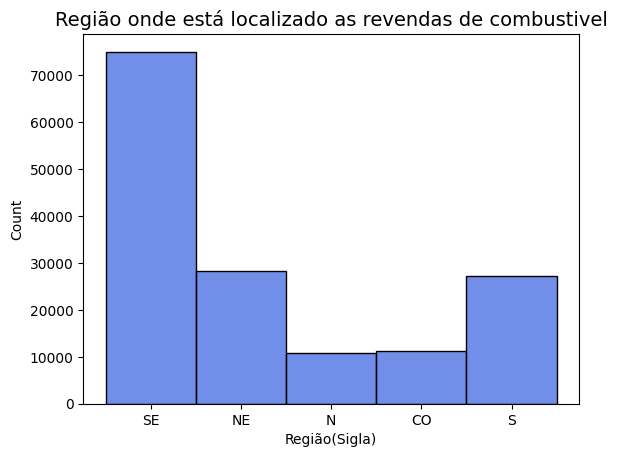

In [ ]:
plt.title('Região onde está localizado as revendas de combustivel',
          fontsize=14)
sns.histplot(x='Regiao - Sigla',data=preco_semestre,color='royalblue')
plt.xlabel('Região(Sigla)');

<Axes: xlabel='Estado - Sigla', ylabel='Count'>

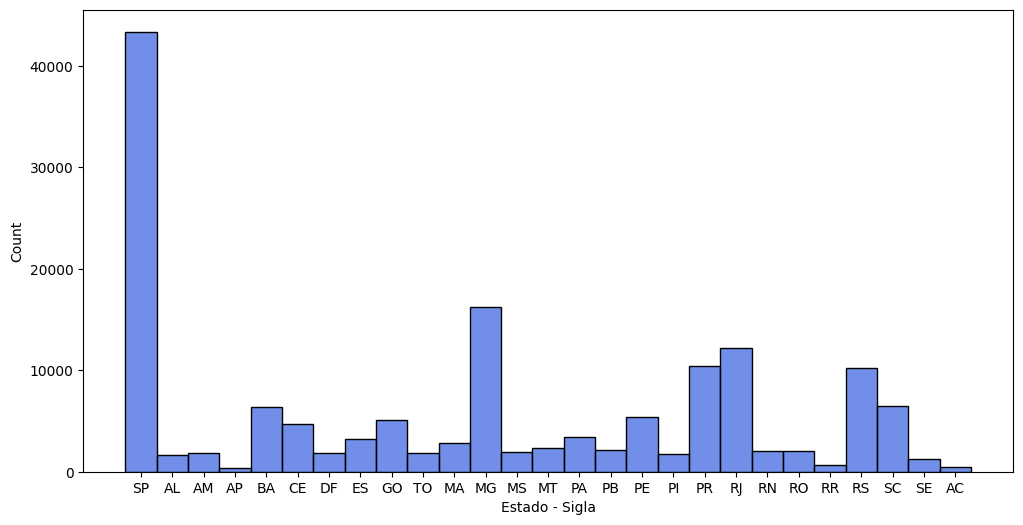

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='Estado - Sigla',data=preco_semestre,color='royalblue')

<Axes: xlabel='Count', ylabel='Bandeira'>

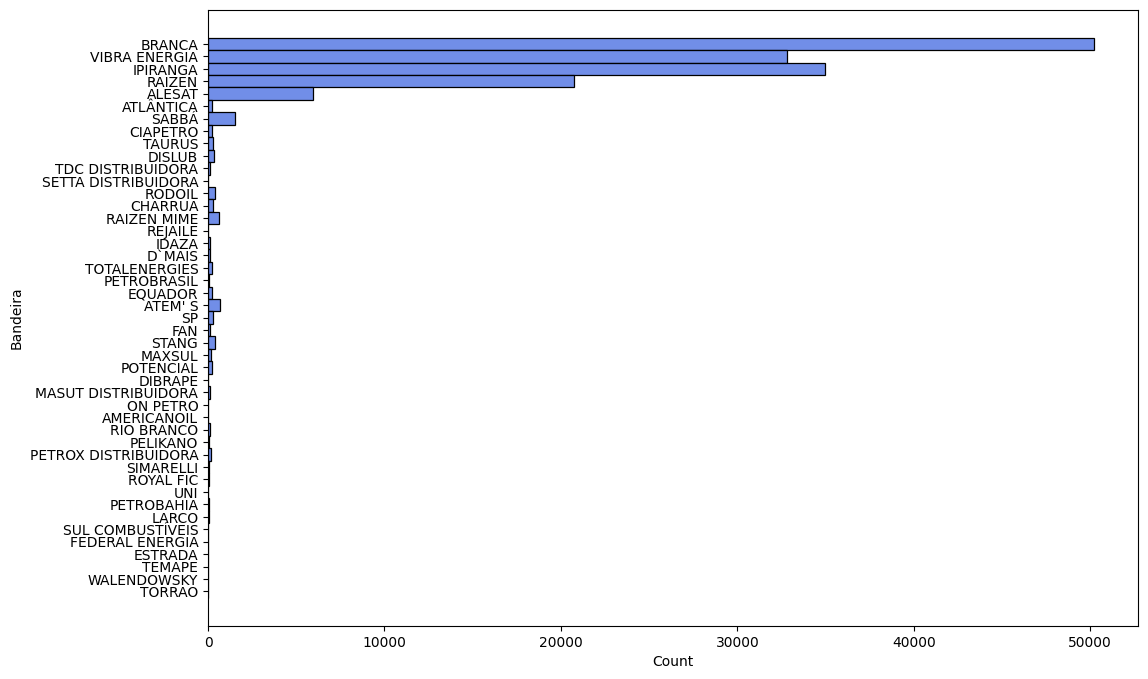

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(y='Bandeira',data=preco_semestre,color='royalblue')

In [ ]:
preco_semestre['Valor de Venda'] = preco_semestre['Valor de Venda'].str.replace(',','.')
# substituindo o , pelo . para conveter a variavel para float
preco_semestre.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,ETANOL,3.39,R$ / litro,BRANCA
1,SE,SP,SOROCABA,DIESEL S10,6.21,R$ / litro,BRANCA
2,SE,SP,SOROCABA,GASOLINA,4.39,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,ETANOL,3.89,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,DIESEL,6.49,R$ / litro,VIBRA ENERGIA


In [ ]:
preco_semestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152262 entries, 0 to 152261
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Regiao - Sigla     152262 non-null  object
 1   Estado - Sigla     152262 non-null  object
 2   Municipio          152262 non-null  object
 3   Produto            152262 non-null  object
 4   Valor de Venda     152261 non-null  object
 5   Unidade de Medida  152261 non-null  object
 6   Bandeira           152261 non-null  object
dtypes: object(7)
memory usage: 8.1+ MB


In [ ]:
preco_semestre['Valor de Venda'] = preco_semestre['Valor de Venda'].astype(float)
preco_semestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152262 entries, 0 to 152261
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     152262 non-null  object 
 1   Estado - Sigla     152262 non-null  object 
 2   Municipio          152262 non-null  object 
 3   Produto            152262 non-null  object 
 4   Valor de Venda     152261 non-null  float64
 5   Unidade de Medida  152261 non-null  object 
 6   Bandeira           152261 non-null  object 
dtypes: float64(1), object(6)
memory usage: 8.1+ MB


In [ ]:
preco_semestre.groupby('Produto').mean() #Preço médio dos combustiveis no Brasil

<ipython-input-17-436809ee241d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Valor de Venda
Produto,
DIESEL,6.177629
DIESEL S10,6.290579
ETANOL,4.059720
GASOLINA,5.134221
GASOLINA ADITIVADA,5.319472
GNV,4.846598


In [ ]:
# Tirando o Gnv

preco_semestre = preco_semestre[preco_semestre['Produto']!='GNV']
preco_semestre.groupby('Produto').mean() # Tirando o Gnv porque são pouco e está em uma medida diferente

<ipython-input-18-9ac877e50cce>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Valor de Venda
Produto,
DIESEL,6.177629
DIESEL S10,6.290579
ETANOL,4.059720
GASOLINA,5.134221
GASOLINA ADITIVADA,5.319472


In [ ]:
preco_semestre.groupby('Produto').median()

<ipython-input-19-87eb42836312>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Valor de Venda
Produto,
DIESEL,6.09
DIESEL S10,6.25
ETANOL,3.99
GASOLINA,5.04
GASOLINA ADITIVADA,5.28


In [ ]:
preco_semestre.groupby('Produto').std()

<ipython-input-20-a44f1f8ea6dc>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Valor de Venda
Produto,
DIESEL,0.424919
DIESEL S10,0.426916
ETANOL,0.433342
GASOLINA,0.370077
GASOLINA ADITIVADA,0.390384


In [ ]:
preco_semestre.groupby(['Produto','Regiao - Sigla']).mean()

<ipython-input-21-c9fd63a174ad>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Valor de Venda
Produto            Regiao - Sigla                
DIESEL             CO                    6.179906
                   N                     6.602351
                   NE                    6.290004
                   S                     6.061113
                   SE                    6.092203
DIESEL S10         CO                    6.308050
                   N                     6.673858
                   NE                    6.331077
                   S                     6.197782
                   SE                    6.236032
ETANOL             CO                    3.780315
                   N                     4.417821
                   NE                    4.314540
                   S                     4.350508
                   SE                    3.914582
GASOLINA           CO                    5.040499
                   N                     5.297510
                   NE                    5.290745
                   S                     5.145200
                   SE                    5.059715
GASOLINA ADITIVADA CO                    5.151343
                   N                     5.475140
                   NE                    5.444303
                   S                     5.299925
                   SE                    5.280716

In [ ]:
media_estado = preco_semestre.groupby(['Produto','Estado - Sigla']).mean()
media_estado.reset_index(inplace=True)
media_estado

<ipython-input-23-957cf132b6cf>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Produto,Estado - Sigla,Valor de Venda
0,DIESEL,AC,7.080388
1,DIESEL,AL,6.638741
2,DIESEL,AM,6.436121
3,DIESEL,AP,6.388261
4,DIESEL,BA,6.255386
...,...,...,...
130,GASOLINA ADITIVADA,RS,5.221556
131,GASOLINA ADITIVADA,SC,5.356056
132,GASOLINA ADITIVADA,SE,5.145625
133,GASOLINA ADITIVADA,SP,5.261273


In [ ]:
px.bar(media_estado,x='Estado - Sigla',y='Valor de Venda',color='Produto')

In [ ]:
preco_semestre_para = preco_semestre[preco_semestre['Estado - Sigla']=='PA']
preco_semestre_para.drop(['Regiao - Sigla','Estado - Sigla','Unidade de Medida'],
                         axis=1,inplace=True)
preco_semestre_para.head()

<ipython-input-26-550a7f08d7a2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Municipio,Produto,Valor de Venda,Bandeira
1398,ALTAMIRA,DIESEL S10,7.19,VIBRA ENERGIA
1399,ALTAMIRA,DIESEL,7.10,VIBRA ENERGIA
1400,ALTAMIRA,GASOLINA ADITIVADA,5.76,VIBRA ENERGIA
1401,ALTAMIRA,GASOLINA,5.76,VIBRA ENERGIA
1402,ALTAMIRA,DIESEL S10,7.03,BRANCA


In [ ]:
preco_semestre_para.groupby('Produto').mean()

<ipython-input-27-cbfe0a630ee2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Valor de Venda
Produto,
DIESEL,6.605782
DIESEL S10,6.649394
ETANOL,4.644496
GASOLINA,5.162673
GASOLINA ADITIVADA,5.397136


In [ ]:
preco_semestre.groupby('Produto').mean()

<ipython-input-28-436809ee241d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Valor de Venda
Produto,
DIESEL,6.177629
DIESEL S10,6.290579
ETANOL,4.059720
GASOLINA,5.134221
GASOLINA ADITIVADA,5.319472


In [ ]:
preco_semestre.groupby(['Produto','Bandeira']).mean()

<ipython-input-29-fcdd1ab4e62c>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Valor de Venda
Produto            Bandeira                     
DIESEL             ALESAT               6.209063
                   ATEM' S              6.504071
                   ATLÂNTICA            5.828571
                   BRANCA               6.067945
                   CHARRUA              6.011304
...                                          ...
GASOLINA ADITIVADA TORRAO               4.970000
                   TOTALENERGIES        5.118537
                   UNI                  5.280000
                   VIBRA ENERGIA        5.381626
                   WALENDOWSKY          5.500000

[205 rows x 1 columns]

In [ ]:
preco_semestre.groupby(['Produto','Bandeira']).mean().sort_values(by='Valor de Venda')

<ipython-input-30-6ffdba52d9cb>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Valor de Venda
Produto    Bandeira                           
ETANOL     TORRAO                     3.570000
           PETROBRASIL                3.608333
           D`MAIS                     3.660000
           ROYAL FIC                  3.696667
           MASUT DISTRIBUIDORA        3.818667
...                                        ...
DIESEL S10 SP                         6.634265
DIESEL     EQUADOR                    6.724815
DIESEL S10 EQUADOR                    6.798243
DIESEL     SIMARELLI                  6.863333
           DISLUB                     6.990000

[205 rows x 1 columns]

In [ ]:
preco_semestre.groupby(['Estado - Sigla','Produto','Bandeira']).mean().sort_values(by='Valor de Venda')

<ipython-input-32-e8bd228a7963>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Valor de Venda
Estado - Sigla Produto    Bandeira                     
GO             ETANOL     TOTALENERGIES        3.470000
MT             ETANOL     BRANCA               3.475210
                          VIBRA ENERGIA        3.500876
                          RAIZEN               3.536753
SP             ETANOL     TOTALENERGIES        3.560370
...                                                 ...
RR             DIESEL S10 IPIRANGA             7.262500
RS             DIESEL S10 POTENCIAL            7.263333
AC             DIESEL     BRANCA               7.286667
RR             DIESEL     SABBÁ                7.320000
               DIESEL S10 SABBÁ                7.420000

[927 rows x 1 columns]